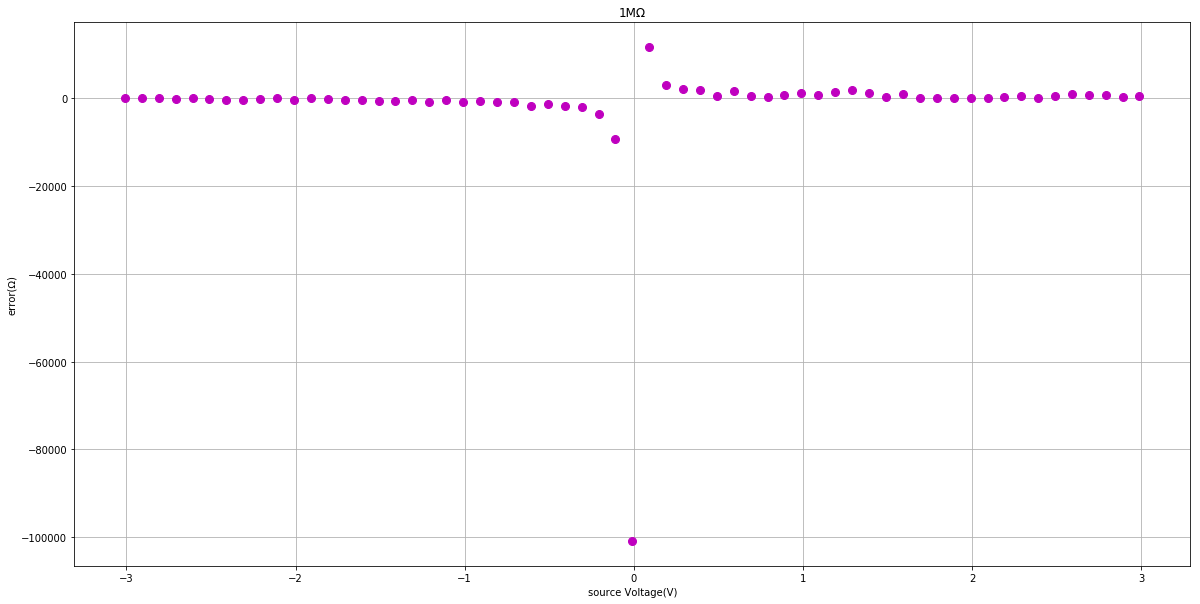

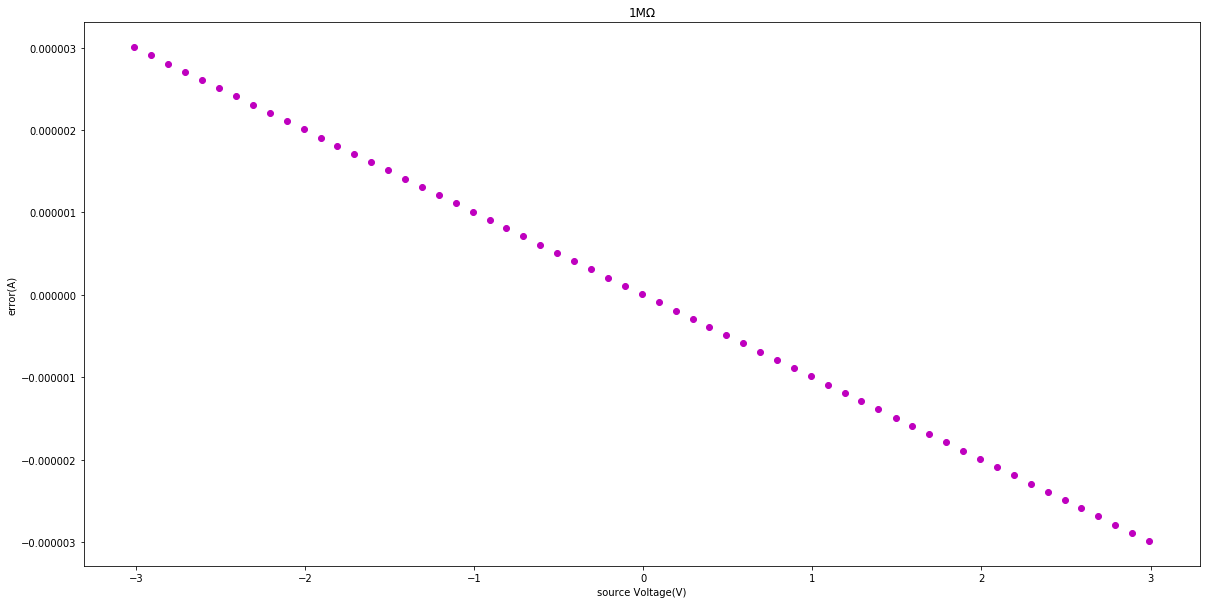

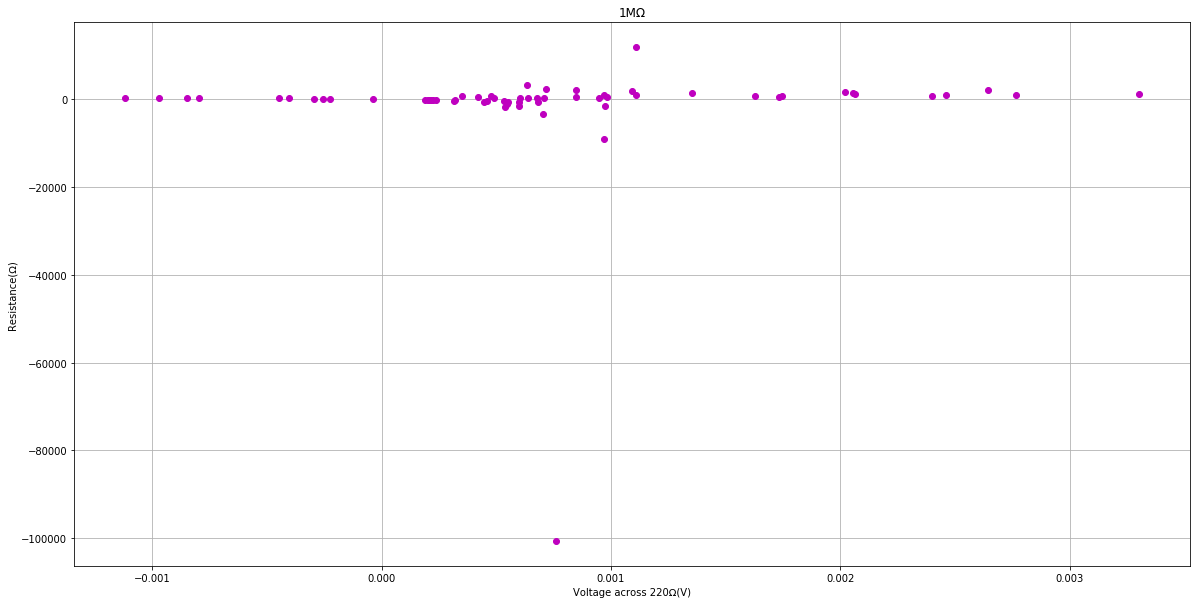

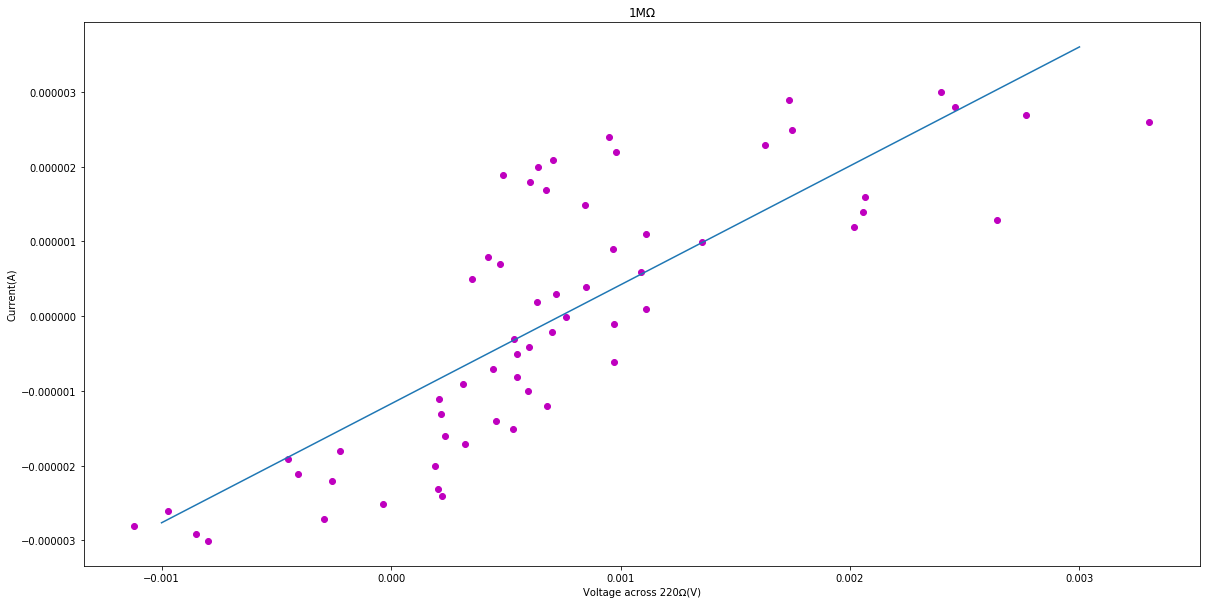

320.51454142706604

In [4]:
#%% 1M + 220
import numpy as np
import matplotlib.pyplot as plt
from scipy.odr import *
o11=np.loadtxt('Data\Os2meandata1010-1600.txt') # 같이
o12=np.loadtxt('Data\Os2meandata1010-1603.txt')
o13=np.loadtxt('Data\Os2meandata1010-1606.txt')
#Volt= np.loadtxt('voltdata11002-0040.txt')  

o14=np.loadtxt('Data\Os2meandata1004-1442.txt')
o15=np.loadtxt('Data\Os2meandata1004-1445.txt')
o16=np.loadtxt('Data\Os2meandata1004-1508.txt')
o17=np.loadtxt('Data\Os2meandata1004-1512.txt')
o18=np.loadtxt('Data\Os2meandata1004-1614.txt')
o19=np.loadtxt('Data\Os2meandata1004-1601.txt')
o20=np.loadtxt('Data\Os2meandata1004-1608.txt')
o21=np.loadtxt('Data\Os2meandata1004-1611.txt')
o22=np.loadtxt('Data\Os2meandata1004-1617.txt')
o23=np.loadtxt('Data\Os2meandata1004-1622.txt')

o24=[]

x1=np.loadtxt('Data\Os2meandata1010-1610.txt') # ㄸㄹ
x2=np.loadtxt('Data\Os2meandata1010-1612.txt')
x3=np.loadtxt('Data\Os2meandata1010-1616.txt')
x4=[]
for i in range(len(x1)):
    x4.append((x1[i]+x2[i]+x3[i])/3)
    o24.append((o11[i]+o12[i]+o13[i])/3)


z=[]
for i in range(len(x4)):
    z.append(x4[i]-o24[i])
R=np.zeros(len(z))
for i in range(len(z)):
    R[i]=z[i]/x4[i] * 1E6

#plt.plot(o24,R,'o',)
Rerror=R-220
plt.figure(figsize=(20,10))
plt.plot(o24,Rerror,'mo',ms=8)

plt.xlabel('source Voltage(V)')
plt.ylabel('error(Ω)')
plt.title('1MΩ')
plt.grid()
plt.show()

plt.figure(figsize=(20,10))
Ierror=[]
for i in range(len(z)):
    Ierror.append(z[i]/R[i]-o24[i]/(500000))
plt.plot(o24,Ierror,'mo')

plt.xlabel('source Voltage(V)')
plt.title('1MΩ')
plt.ylabel('error(A)')
plt.show()

plt.figure(figsize=(20,10))
plt.plot(z,R,'mo')
plt.xlabel('Voltage across 220Ω(V)')
plt.title('1MΩ')
plt.ylabel('Resistance(Ω)')
plt.grid()
plt.show()

def linear_func(B, x):
    return B[0]*x+B[1]

linear=Model(linear_func)
data=RealData(z,z/R)
odr=ODR(data, linear, beta0=[0,1])
out=odr.run()

plt.figure(figsize=(20,10))
plt.plot(z,z/R,'mo')
a=np.linspace(-0.001,0.003,10000)
plt.plot(a,linear_func(out.beta,a))
plt.xlabel('Voltage across 220Ω(V)')
plt.title('1MΩ')
plt.ylabel('Current(A)')

plt.show()
#plt.ylim(-1000,1000)
np.median(R)